# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Riky raharjo
- **Email:** rikyraharjo18@gmail.com
- **ID Dicoding:** riky raharjo

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Berapa rata-rata penyewa sepeda tiap bulannya pada tahun 2012?
- Pertanyaan 2 : Dibulan apa penyewaan sepeda terbanyak dan terendah tahun 2012.

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Setelah mengimport library yang sibutuhkan, selanjutnya melakukan proses ghatering data atau proses pengumpulan data. karena data dari dicoding jadi kita tinggal me-load datanya.

### Gathering Data

In [ ]:
# menghubungkan collab dengan g.drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# import data hour.csv
bike_df = pd.read_csv('/content/gdrive/MyDrive/Submission Analisis Data menggunakan Python/data/hour.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Setelah proses gathering, selanjutnya proses assessing atau proses penilaian kualitas data.

In [ ]:
# menilai data customers_df
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


jumlah data sudah sama antar kolomnya. tetapi terdapat dtype yang kurang sesuai pada kolom dteday.

In [ ]:
# menampilkan jumlah missing values
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value

In [ ]:
# perika dupliacted data
print("Jumlah duplikasi: ", bike_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada data duplicated

In [ ]:
# memeriksa parameter statistik dari kolom numerik
bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Menampilkan informasi parameter statistik. Tidak ada keanehan pada data.

### Cleaning Data

membersihkan data bike_df

In [ ]:
# mengganti tipe data
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])

merubah kembali tipe data atribut yang sebaiknya kategori sesuai pada Readme.txt

In [ ]:
## Mengubah tipe data pada beberapa kolom
bike_df['season'] = bike_df.season.astype('category')
bike_df['mnth'] = bike_df.mnth.astype('category')
bike_df['yr'] = bike_df.yr.astype('category')
bike_df['holiday'] = bike_df.holiday.astype('category')
bike_df['weekday'] = bike_df.weekday.astype('category')
bike_df['workingday'] = bike_df.workingday.astype('category')
bike_df['weathersit'] = bike_df.weathersit.astype('category')

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
# Konversi nilai untuk kolom 'season'
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
bike_df['season'] = bike_df['season'].map(season_map)

# Konversi nilai untuk kolom 'yr'
year_map = {0: 2011, 1: 2012}
bike_df['yr'] = bike_df['yr'].map(year_map)

# Mengganti nilai bulan
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
bike_df['mnth'] = bike_df['mnth'].map(month_map)

# Konversi nilai untuk kolom 'weathersit'
weather_map = {1: 'Clear', 2: 'Misty', 3: 'Light_RainSnow', 4: 'Heavy_RainSnow'}
bike_df['weathersit'] = bike_df['weathersit'].map(weather_map)

# Konversi nilai untuk kolom 'weekday'
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
bike_df['weekday'] = bike_df['weekday'].map(weekday_map)

# Konversi nilai untuk kolom 'workingday'
workingday_map = {0: 'No', 1: 'Yes'}
bike_df['workingday'] = bike_df['workingday'].map(workingday_map)

Selanjutnya kita akan menghapus kolom yang tidak diperlukan.

In [ ]:
# Drop kolom yang tidak digunakan dalam data analisis
data_cleaned = bike_df.drop("instant", axis=1)
data_cleaned.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,0,0,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,1,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,2,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,3,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,4,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


mengubah nama tiap kolom agar lebih mudah dipahami

In [ ]:
# Memperbaiki nama kolom yang kurang jelas
data_cleaned.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count",
    'hr':'hour'}, inplace=True
)

In [ ]:
# Normalisasi kembali ke dalam nilai yang belum dinormalisasi
data_cleaned['temp'] = data_cleaned['temp'] * 41
data_cleaned['atemp'] = data_cleaned['atemp'] * 50
data_cleaned['humidity'] = data_cleaned['humidity'] * 100
data_cleaned['windspeed'] = data_cleaned['windspeed'] * 67

In [ ]:
# cek data setelah dirubah
data_cleaned.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Winter,2011,Jan,0,0,Saturday,No,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,1,0,Saturday,No,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,2,0,Saturday,No,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,3,0,Saturday,No,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,4,0,Saturday,No,Clear,9.84,14.395,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Periksa struktur data, jumlah baris dan kolom
print("Shape of the dataset:", data_cleaned.shape)

# Periksa tipe data dari setiap kolom
print("Data types of each column:")
print(data_cleaned.dtypes)

Shape of the dataset: (17379, 16)
Data types of each column:
date           datetime64[ns]
season               category
year                 category
month                category
hour                    int64
holiday              category
weekday              category
workingday           category
weather              category
temp                  float64
atemp                 float64
humidity              float64
windspeed             float64
casual                  int64
registered              int64
total_count             int64
dtype: object


Selanjutnya kita akan melihat data penyewa sepeda menggunakan bar chart

Selanjutnya menghitung banyak penyewa per tanggal/hari

In [ ]:
date_count = data_cleaned.groupby('date').agg({'total_count': 'sum'}).reset_index()
date_count

,date,total_count
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


In [ ]:
# perminggu
weekly_average = date_count.resample('W', on='date').mean()
weekly_average

,total_count
date,
2011-01-02,893.000000
2011-01-09,1344.000000
2011-01-16,1289.285714
2011-01-23,1252.857143
2011-01-30,1099.857143
...,...
2012-12-09,5394.571429
2012-12-16,5138.000000
2012-12-23,3813.714286


In [ ]:
# perbulan
month_counts = data_cleaned.groupby('month').agg({'total_count':'sum'}).reset_index()
month_counts

,month,total_count
0,Jan,134933
1,Feb,151352
2,Mar,228920
3,Apr,269094
4,May,331686
5,Jun,346342
6,Jul,344948
7,Aug,351194
8,Sep,345991
9,Oct,322352


In [ ]:
# pertahun
yearly_counts = data_cleaned.groupby(['year','month']).agg({'total_count':'sum'}).reset_index()
yearly_counts

,year,month,total_count
0,2011,Jan,38189
1,2011,Feb,48215
2,2011,Mar,64045
3,2011,Apr,94870
4,2011,May,135821
5,2011,Jun,143512
6,2011,Jul,141341
7,2011,Aug,136691
8,2011,Sep,127418
9,2011,Oct,123511


Selanjutnya kita  menghitung rata-rata dan total jumlah total_count (jumlah pengguna) berdasarkan bulan dan jenis hari (workingday atau non-workingday).

In [ ]:
monthly_weekday_counts = data_cleaned.groupby(['month', 'workingday']).agg(
    {'total_count': ['mean', 'sum']
     }).reset_index()
monthly_weekday_counts

month workingday total_count        
                           mean     sum
0    Jan         No   78.576628   41017
1    Jan        Yes  103.545755   93916
2    Feb         No   94.271028   40348
3    Feb        Yes  121.581599  111004
4    Mar         No  153.111386   61857
5    Mar        Yes  156.279701  167063
6    Apr         No  185.956250   89259
7    Apr        Yes  187.915361  179835
8    May         No  232.129386  105851
9    May        Yes  218.832364  225835
10   Jun         No  256.414216  104617
11   Jun        Yes  234.229651  241725
12   Jul         No  225.234127  113518
13   Jul        Yes  235.193089  231430
14   Aug         No  214.056604   79415
15   Aug        Yes  246.176630  271779
16   Sep         No  254.925000  122364
17   Sep        Yes  233.675026  223627
18   Oct         No  212.947917  102215
19   Oct        Yes  226.711637  220137
20   Nov         No  168.479167   80870
21   Nov        Yes  181.777429  173961
22   Dec         No  117.640719   58938
23   Dec        Yes  154.885947  152098

menghitung total jumlah total_count (jumlah pengguna) berdasarkan jenis hari kerja (workingday).

In [ ]:
workingday= data_cleaned.groupby('workingday')['total_count'].sum()
workingday

workingday
No     1000269
Yes    2292410
Name: total_count, dtype: int64

 menghitung total jumlah total_count (jumlah pengguna) berdasarkan jam dalam sehari.

In [ ]:
hourly_usage = data_cleaned.groupby(['hour']).agg({'total_count':'sum'}).reset_index()
hourly_usage

,hour,total_count
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


mengelompokkan data berdasarkan tanggal dan musim, kemudian menghitung rata-rata suhu (temp) dan total jumlah total_count (jumlah pengguna) untuk setiap kombinasi tanggal dan musim.

In [ ]:
# Group by date and season, calculate average temperature and total count
seasonal_data = data_cleaned.groupby(['date', 'season']).agg({
    'temp': 'mean',
    'total_count': 'sum'
    }).reset_index()
seasonal_data

,date,season,temp,total_count
0,2011-01-01,Winter,14.110833,985
1,2011-01-01,Spring,NaN,0
2,2011-01-01,Summer,NaN,0
3,2011-01-01,Fall,NaN,0
4,2011-01-02,Winter,14.902609,801
...,...,...,...,...
2919,2012-12-30,Fall,NaN,0
2920,2012-12-31,Winter,8.849167,2729
2921,2012-12-31,Spring,NaN,0
2922,2012-12-31,Summer,NaN,0


menghitung total jumlah total_count (jumlah pengguna) berdasarkan musim dan tahun.

In [ ]:
season_year = data_cleaned.groupby(by=['season', 'year']).agg('total_count').sum().reset_index()
season_year

,season,year,total_count
0,Winter,2011,150000
1,Winter,2012,321348
2,Spring,2011,347316
3,Spring,2012,571273
4,Summer,2011,419650
5,Summer,2012,641479
6,Fall,2011,326137
7,Fall,2012,515476


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa rata-rata penyewa sepeda tiap bulannya pada tahun 2012?

<ipython-input-31-f56fdc3bba45>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_average_2012 = data_2012.resample('M', on='date').mean()


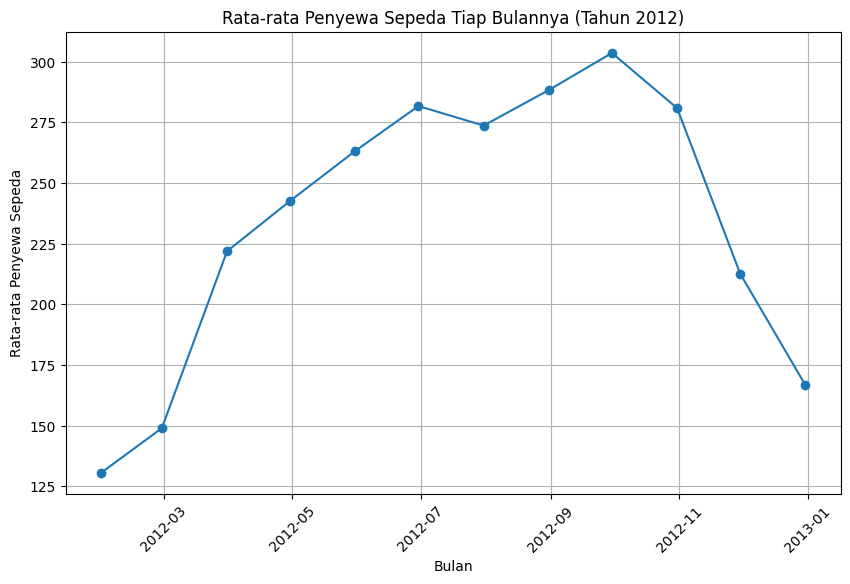

In [ ]:
# Filter data untuk tahun 2012
data_2012 = data_cleaned[data_cleaned['year'] == 2012]

# Menghitung rata-rata total_count per bulan untuk tahun 2012
monthly_average_2012 = data_2012.resample('M', on='date').mean()

# Plot rata-rata penyewa sepeda tiap bulannya pada tahun 2012
plt.figure(figsize=(10, 6))
plt.plot(monthly_average_2012.index, monthly_average_2012['total_count'], marker='o', linestyle='-')
plt.title('Rata-rata Penyewa Sepeda Tiap Bulannya (Tahun 2012)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewa Sepeda')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Pertanyaan 2: Dibulan apa penyewaan sepeda terbanyak dan terendah tahun 2012.

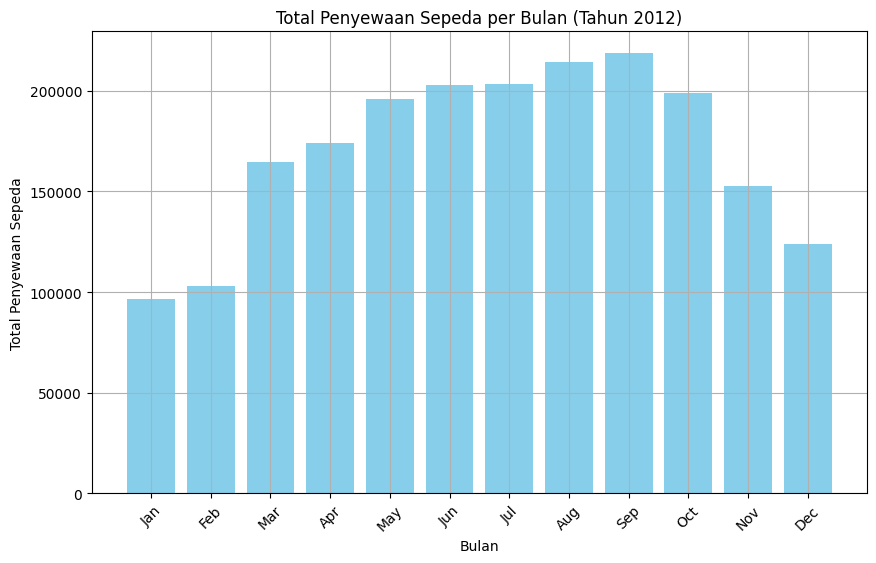

Penyewaan sepeda terbanyak terjadi di bulan Sep
Penyewaan sepeda terendah terjadi di bulan Jan


In [ ]:
# Filter data untuk tahun 2012
data_2012 = data_cleaned[data_cleaned['year'] == 2012]

# Mengelompokkan data berdasarkan bulan dan menghitung total_count
month_counts = data_2012.groupby('month').agg({'total_count':'sum'}).reset_index()

# Menentukan bulan dengan total_count terbesar dan terkecil
bulan_terbanyak = month_counts.loc[month_counts['total_count'].idxmax()]['month']
bulan_terendah = month_counts.loc[month_counts['total_count'].idxmin()]['month']

# Plot total penyewaan sepeda per bulan dalam tahun 2012
plt.figure(figsize=(10, 6))
plt.bar(month_counts['month'], month_counts['total_count'], color='skyblue')
plt.title('Total Penyewaan Sepeda per Bulan (Tahun 2012)')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print(f"Penyewaan sepeda terbanyak terjadi di bulan {bulan_terbanyak}")
print(f"Penyewaan sepeda terendah terjadi di bulan {bulan_terendah}")

In [ ]:
# export data yang sudah bersih ke csv
data_cleaned.to_csv('/content/gdrive/MyDrive/Submission Analisis Data menggunakan Python/CleareData.csv', index=False)

## Conclusion

- Conclution pertanyaan 1 :
Berdasarkan grafik yang ditampilkan rata-rata pengendara sepeda berada di > 120 sampai dengan >300 tiap bulanya pada tahun 2012. di bulan 10 atau oktober mengalami peningkatan tertinggi, dan di bulan 11 mengalami penurunan yang tajam.

- Conclution pertanyaan 2 :
Pengguna sepeda terbanyak terjadi pada bulan september dan terendah pada bulan januari pada tahun 2012.